In [ ]:
# Importing all the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import pickle

# Importing the dataset
df = pd.read_excel('/content/customer_purchase_data.xlsx')
df.sample(5)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
570,55,1,67779.474898,20,1,35.969068,0,1,0
961,70,0,119425.274117,4,3,45.355881,0,5,0
849,53,1,83384.255178,17,1,29.722865,0,5,0
417,40,1,144549.552416,18,0,38.180330,1,4,1
481,62,1,119959.961674,4,3,30.080881,0,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
df.describe() # apply describe funtion on numerical columns to know the stats about that column

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [ ]:
df.isnull().sum() # No null value in the dataset

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [ ]:
# Making a list of numerical colums and categorical columns
numerical_cols = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite']
categorical_cols = ['Gender', 'ProductCategory', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']

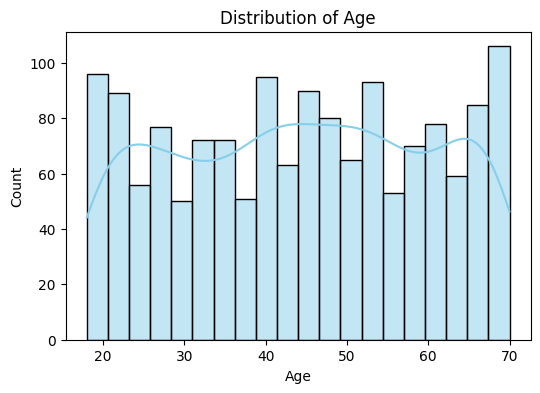

In [ ]:
# Plot for Age

# conclusions :-
# 1. Distribution looks fairly uniform.
# 2. Suggests that age may not be a dominant driver of purchases, since no group is overly concentrated.

plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Age")
plt.show()

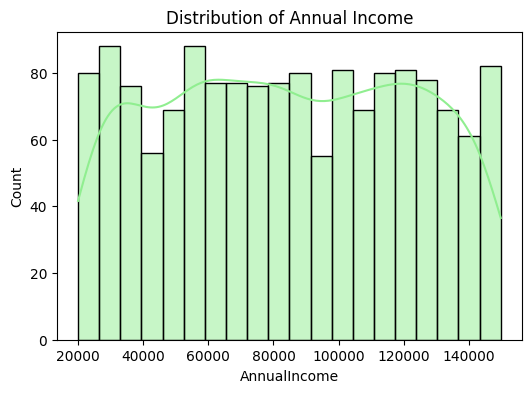

In [ ]:
# Plot for Annual Income
# Distribution is evenly spread.
# Indicates customers come from diverse economic backgrounds, so income could influence purchase behavior.

plt.figure(figsize=(6,4))
sns.histplot(df['AnnualIncome'], kde=True, bins=20, color="lightgreen")
plt.title("Distribution of Annual Income")
plt.show()

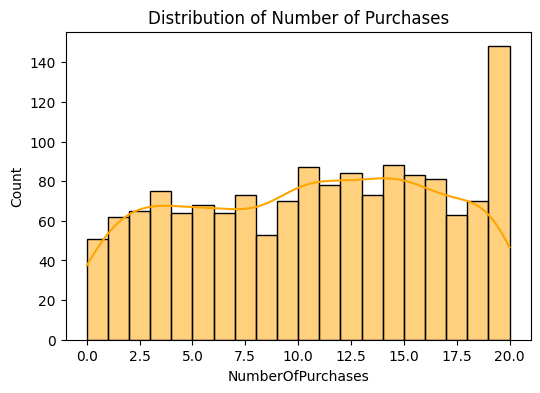

In [ ]:
# Plot for Number of Purchases
# Slight peaks at high values (~20).
# Highly loyal customers (repeat buyers).

plt.figure(figsize=(6,4))
sns.histplot(df['NumberOfPurchases'], kde=True, bins=20, color="orange")
plt.title("Distribution of Number of Purchases")
plt.show()

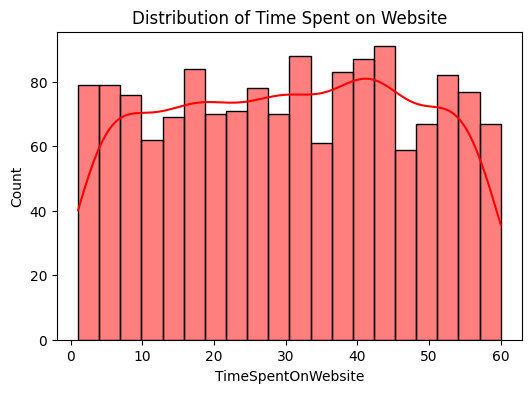

In [ ]:
# Plot for Time Spent on Website
# Distribution is fairly balanced with slight peaks around mid-values (30–40 mins).
# Suggests most customers spend a moderate amount of time, but time alone may not guarantee a purchase.

plt.figure(figsize=(6,4))
sns.histplot(df['TimeSpentOnWebsite'], kde=True, bins=20, color="red")
plt.title("Distribution of Time Spent on Website")
plt.show()

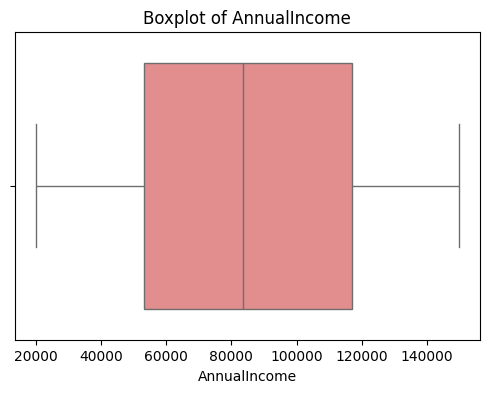

In [ ]:
# Ploting boxplot the check for the outlier on annual income
# No outlier found
plt.figure(figsize=(6,4))
sns.boxplot(x=df['AnnualIncome'], color="lightcoral")
plt.title(f"Boxplot of AnnualIncome")
plt.show()

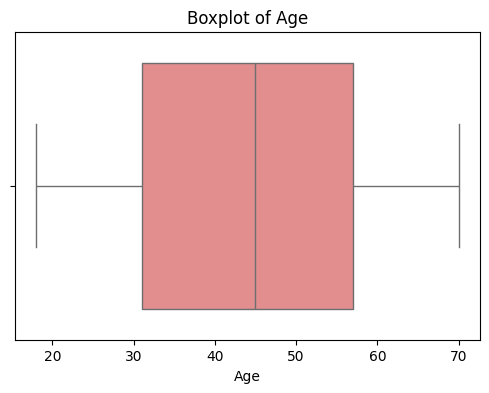

In [ ]:
# Ploting boxplot the check for the outlier on annual income
# No outlier found

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'], color="lightcoral")
plt.title(f"Boxplot of Age")
plt.show()

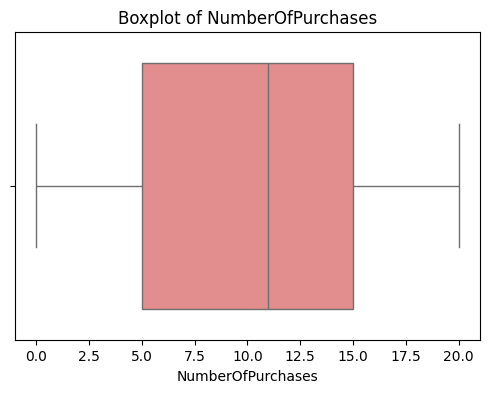

In [ ]:
# Ploting boxplot the check for the outlier on annual income
# No outlier found

plt.figure(figsize=(6,4))
sns.boxplot(x=df['NumberOfPurchases'], color="lightcoral")
plt.title(f"Boxplot of NumberOfPurchases")
plt.show()

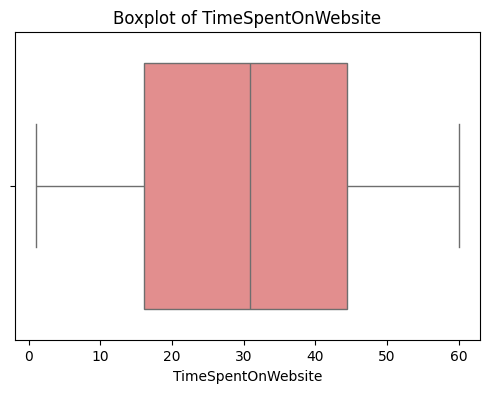

In [ ]:
# Ploting boxplot the check for the outlier on annual income
# No outlier found

plt.figure(figsize=(6,4))
sns.boxplot(x=df['TimeSpentOnWebsite'], color="lightcoral")
plt.title(f"Boxplot of TimeSpentOnWebsite")
plt.show()

/tmp/ipython-input-4230320468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette="Set2")


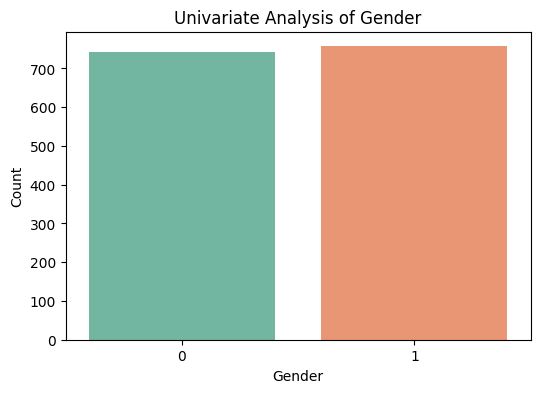

In [ ]:
# Gender :
# purchase are evenly spread accross male and female
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette="Set2")
plt.title("Univariate Analysis of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-851456419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ProductCategory', palette="Set2")


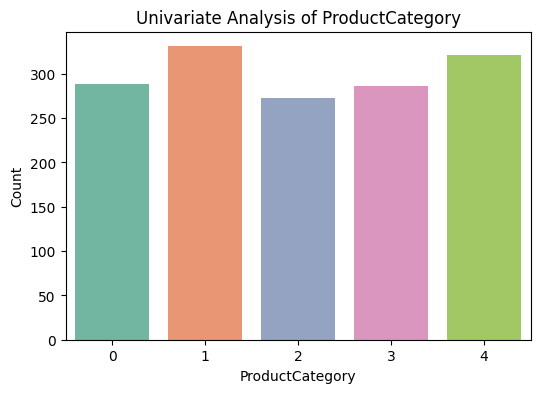

In [ ]:
# ProductCategory
# Purchase is also evenly spread accross all categories
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ProductCategory', palette="Set2")
plt.title("Univariate Analysis of ProductCategory")
plt.xlabel("ProductCategory")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-4274362063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='LoyaltyProgram', palette="Set2")


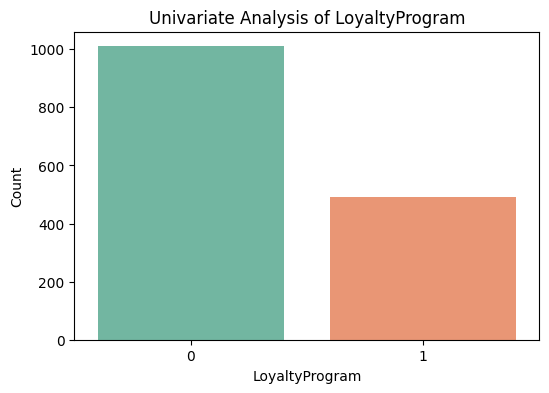

In [ ]:
# LoyaltyProgram
# most of the customer is not part of layality program it will be more benificial when we will perform bivariate analysis on this with purchase status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='LoyaltyProgram', palette="Set2")
plt.title("Univariate Analysis of LoyaltyProgram")
plt.xlabel("LoyaltyProgram")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-467699763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DiscountsAvailed', palette="Set2")


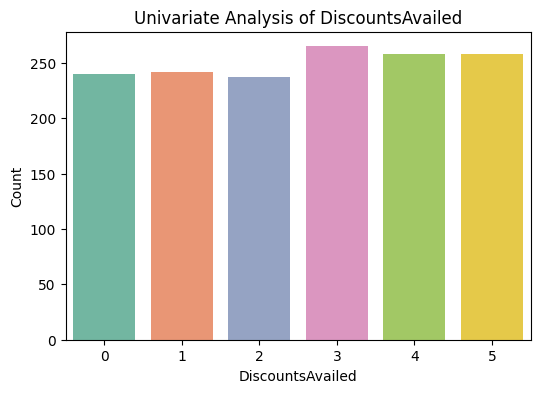

In [ ]:
# DiscountsAvailed
# DiscountAvalid is also evenly distributed
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='DiscountsAvailed', palette="Set2")
plt.title("Univariate Analysis of DiscountsAvailed")
plt.xlabel("DiscountsAvailed")
plt.ylabel("Count")
plt.show()

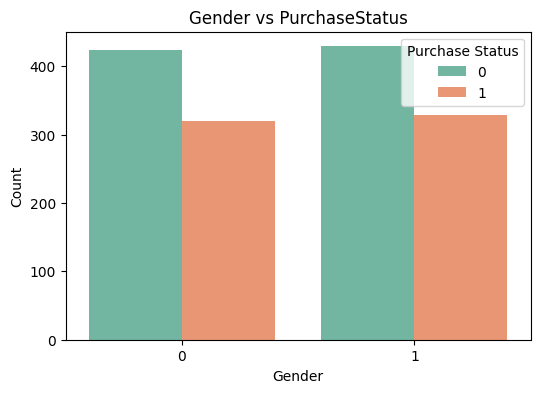

In [ ]:
# Gender vs PurchaseStatus
# male and female both are purchasing equally
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='PurchaseStatus', palette="Set2")
plt.title("Gender vs PurchaseStatus")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Purchase Status")
plt.show()

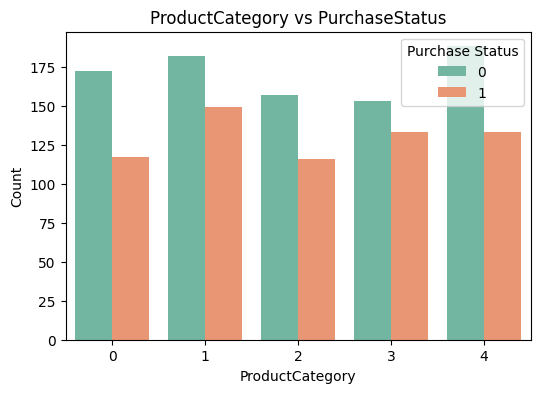

In [ ]:
# ProductCategory vs PurchaseStatus
# all products are purchase evenly
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ProductCategory', hue='PurchaseStatus', palette="Set2")
plt.title("ProductCategory vs PurchaseStatus")
plt.xlabel("ProductCategory")
plt.ylabel("Count")
plt.legend(title="Purchase Status")
plt.show()

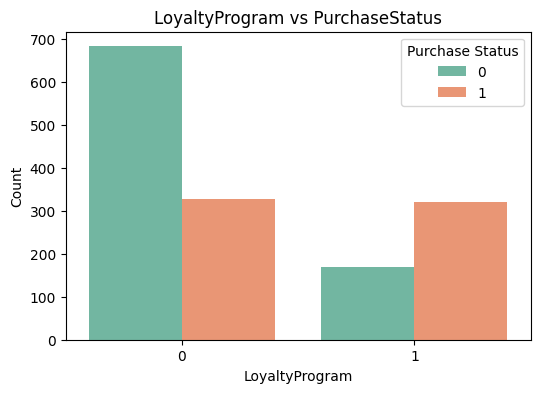

In [ ]:
# LoyaltyProgram vs PurchaseStatus
# customer is part of loyality program pruchase status remain the same it means it may not have high imapact on the purchase status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='LoyaltyProgram', hue='PurchaseStatus', palette="Set2")
plt.title("LoyaltyProgram vs PurchaseStatus")
plt.xlabel("LoyaltyProgram")
plt.ylabel("Count")
plt.legend(title="Purchase Status")
plt.show()

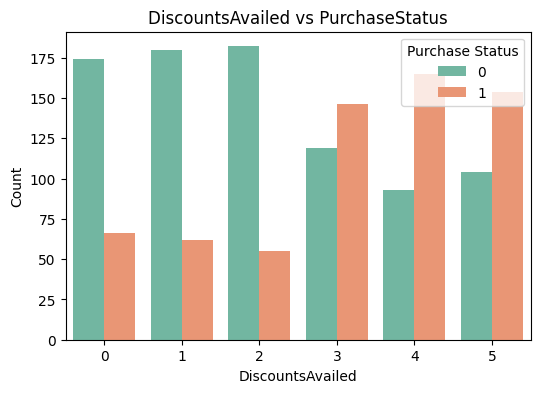

In [ ]:
# DiscountsAvailed vs PurchaseStatus
# Higher the discount higher purchase rate
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='DiscountsAvailed', hue='PurchaseStatus', palette="Set2")
plt.title("DiscountsAvailed vs PurchaseStatus")
plt.xlabel("DiscountsAvailed")
plt.ylabel("Count")
plt.legend(title="Purchase Status")
plt.show()

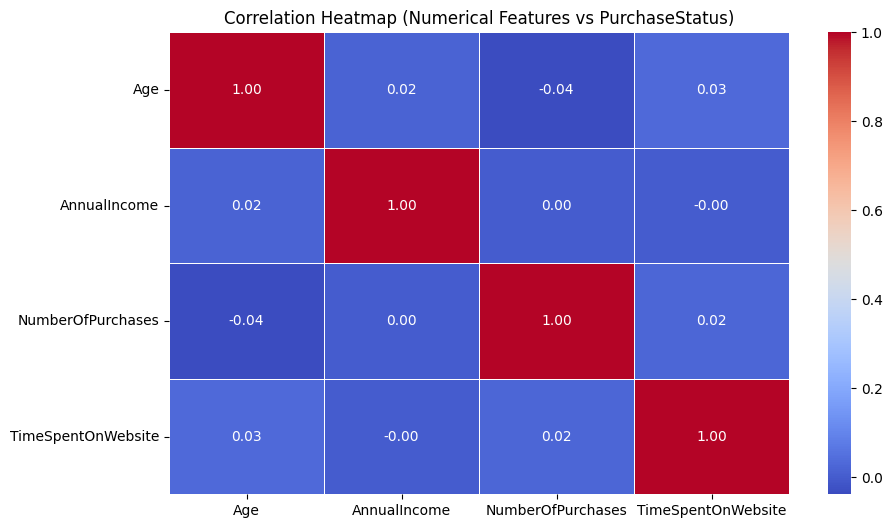

In [ ]:
corr = df[numerical_cols].corr()

# Plot heatmap
# The correlation heatmap shows that the numerical features are nearly independent (low correlation).
# This reduces redundancy among predictors.
# suggests that a non-linear model (like Decision Tree) may be better suited to capture relationships with PurchaseStatus.

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features vs PurchaseStatus)")
plt.show()

In [ ]:
# Assuming 'PurchaseStatus' is the target
X = df.drop(columns=['PurchaseStatus'])  # Features
y = df['PurchaseStatus']  # Target

In [ ]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df['LoyaltyProgram'] = df['LoyaltyProgram'].map({0: 'No', 1: 'Yes'})

In [ ]:
# Apply one-hot encoding to categorical columns
data = pd.get_dummies(df, columns=['Gender', 'LoyaltyProgram'], drop_first=True)
data

,Age,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,DiscountsAvailed,PurchaseStatus,Gender_Male,LoyaltyProgram_Yes
0,40,66120.267939,8,0,30.568601,5,1,False,False
1,20,23579.773583,4,2,38.240097,5,0,False,False
2,27,127821.306432,11,2,31.633212,0,1,False,True
3,24,137798.623120,19,3,46.167059,4,1,False,False
4,31,99300.964220,19,1,19.823592,0,1,False,False
...,...,...,...,...,...,...,...,...,...
1495,39,65048.141834,13,0,34.590743,5,1,False,False
1496,67,28775.331069,18,2,17.625707,1,1,False,False
1497,40,57363.247541,7,4,12.206033,0,0,False,False
1498,63,134021.775532,16,2,37.311634,0,1,True,True


In [ ]:
# Define the features (X) and target (y)
X = data.drop(columns=['PurchaseStatus'])  # Features
y = data['PurchaseStatus']  # Target variable

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict the target values
y_pred = model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.91
Recall: 0.83
F1 Score: 0.87
Accuracy: 0.89


In [ ]:
Pkl_Filename = "practical4_customers.pkl"  # File name where model will be saved
with open(Pkl_Filename, 'wb') as file:
    pickle.dump(model, file)  # Saving the model

print(f"Model saved to {Pkl_Filename}")

Model saved to practical4_customers.pkl


In [ ]:
# Load the model from the file
with open(Pkl_Filename, 'rb') as file:
    loaded_model = pickle.load(file)  # Loading the model

In [ ]:
# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
print(f"Predictions: {predictions}")

Predictions: [1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1]


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


#Hyper parameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

tuned_dt_classifier = grid_search.best_estimator_

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


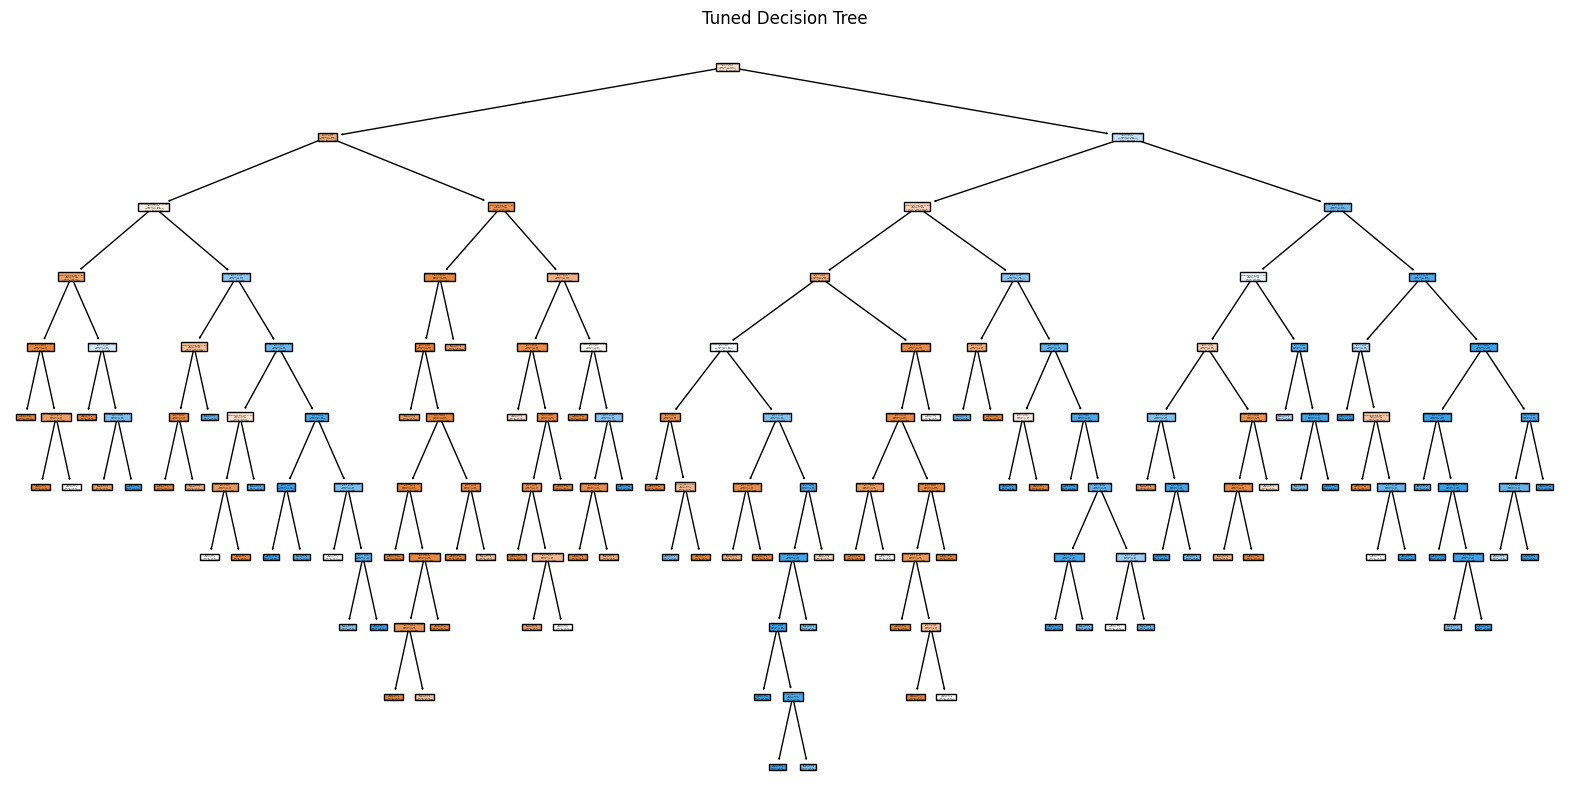

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tuned_dt_classifier, feature_names=X_train.columns, class_names=['No Purchase', 'Purchase'], filled=True)
plt.title("Tuned Decision Tree")
plt.show()

# Evaluation


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_tuned = tuned_dt_classifier.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")
print(f"Tuned Model Precision: {precision_tuned:.4f}")
print(f"Tuned Model Recall: {recall_tuned:.4f}")
print(f"Tuned Model F1-score: {f1_tuned:.4f}")

Tuned Model Accuracy: 0.9233
Tuned Model Precision: 0.9412
Tuned Model Recall: 0.8750
Tuned Model F1-score: 0.9069


In [ ]:
with open(Pkl_Filename, 'rb') as file:
    loaded_model = pickle.load(file)  # Loading the model

In [ ]:
# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
print(f"Predictions: {predictions}")

Predictions: [1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1]
